
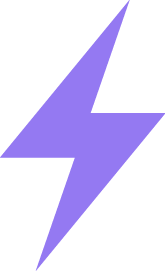

Running local mode, some functionality limited.



In [2]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile

##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

pop = pd.read_csv('../API_SP.POP.TOTL_DS2_en_csv_v2.csv') #from https://github.com/dphuang2/streamsets_scripts/blob/master/IM-testing/origin/API_SP.POP.TOTL_DS2_en_csv_v2.csv
latlong = pd.read_csv('../simplemaps-worldcities-basic.csv') #from https://simplemaps.com/data/world-cities

pop.head()

latlong.head()

pop = pop[['Country Code','2016']]
df = pd.merge(pop, latlong, left_on='Country Code', right_on='iso3')

In [3]:
df.head()

Country Code        2016           city   city_ascii        lat        lng  \
0          ABW    104822.0     Oranjestad   Oranjestad  12.530384 -70.028992   
1          AFG  34656032.0  Qal eh-ye Now    Qal eh-ye  34.983000  63.133300   
2          AFG  34656032.0    Chaghcharan  Chaghcharan  34.516701  65.250001   
3          AFG  34656032.0    Lashkar Gah  Lashkar Gah  31.582998  64.360000   
4          AFG  34656032.0         Zaranj       Zaranj  31.112001  61.886998   

        pop      country iso2 iso3 province  
0   50887.5        Aruba   AW  ABW      NaN  
1    2997.0  Afghanistan   AF  AFG  Badghis  
2   15000.0  Afghanistan   AF  AFG     Ghor  
3  201546.0  Afghanistan   AF  AFG  Hilmand  
4   49851.0  Afghanistan   AF  AFG   Nimroz

In [4]:
df.sort_values('pop',ascending=False)

Country Code          2016              city        city_ascii  \
3554          JPN  1.269945e+08             Tokyo             Tokyo   
3285          IND  1.324171e+09            Mumbai            Mumbai   
4110          MEX  1.275404e+08       Mexico City       Mexico City   
1942          CHN  1.378665e+09          Shanghai          Shanghai   
1128          BRA  2.076529e+08         Sao Paulo         Sao Paulo   
6946          USA  3.231275e+08          New York          New York   
4596          PAK  1.932035e+08           Karachi           Karachi   
275           ARG  4.384743e+07      Buenos Aires      Buenos Aires   
3273          IND  1.324171e+09             Delhi             Delhi   
5506          RUS  1.443424e+08            Moscow            Moscow   
5987          TUR  7.951243e+07          Istanbul          Istanbul   
616           BGD  1.629516e+08             Dhaka             Dhaka   
2471          EGY  9.568868e+07             Cairo             Cairo   
3749          KOR  5.124571e+07             Seoul             Seoul   
3286          IND  1.324171e+09           Kolkata           Kolkata   
1941          CHN  1.378665e+09           Beijing           Beijing   
3073          IDN  2.611155e+08           Jakarta           Jakarta   
6944          USA  3.231275e+08       Los Angeles       Los Angeles   
2744          GBR  6.563724e+07            London            London   
3364          IRN  8.027743e+07            Tehran            Tehran   
4700          PER  3.177384e+07              Lima              Lima   
4738          PHL  1.033202e+08            Manila            Manila   
2175          COL  4.865342e+07            Bogota            Bogota   
3553          JPN  1.269945e+08             Osaka             Osaka   
1127          BRA  2.076529e+08    Rio de Janeiro    Rio de Janeiro   
2086          COD  7.873615e+07          Kinshasa          Kinshasa   
4595          PAK  1.932035e+08            Lahore            Lahore   
1922          CHN  1.378665e+09         Guangzhou         Guangzhou   
3284          IND  1.324171e+09         Bangalore         Bangalore   
6943          USA  3.231275e+08           Chicago           Chicago   
...           ...           ...               ...               ...   
6387          USA  3.231275e+08           Montana           Montana   
4247          MRT  4.301018e+06            Chegga            Chegga   
4248          MRT  4.301018e+06       Magta Lajar       Magta Lajar   
4256          MRT  4.301018e+06       Bir Mogrein       Bir Mogrein   
5399          RUS  1.443424e+08          Rusanovo          Rusanovo   
4355          NER  2.067299e+07             Djado             Djado   
5332          RUS  1.443424e+08        Mikhaylova        Mikhaylova   
292           AUS  2.412716e+07  Newcastle Waters  Newcastle Waters   
5331          RUS  1.443424e+08      Starorybnoye      Starorybnoye   
422           AUS  2.412716e+07          Erldunda          Erldunda   
5324          RUS  1.443424e+08             Komsa             Komsa   
1493          CHL  1.790975e+07           Lagunas           Lagunas   
4597          PAN  4.034119e+06       El Porvenir       El Porvenir   
4654          PER  3.177384e+07            Andoas            Andoas   
898           BRA  2.076529e+08            Uruara            Uruara   
2860          GRL  5.618600e+04              Nord              Nord   
5305          RUS  1.443424e+08             Numto             Numto   
4685          PER  3.177384e+07            Gueppi            Gueppi   
4653          PER  3.177384e+07         Puca Urco         Puca Urco   
2857          GRL  5.618600e+04       Timmiarmiut       Timmiarmiut   
5371          RUS  1.443424e+08        Ust Olensk        Ust Olensk   
2861          GRL  5.618600e+04       Qeqertasuaq       Qeqertasuaq   
6135          UKR  4.500464e+07         Chernobyl         Chernobyl   
5236          RUS  1.443424e+08        Logashkino        Logashkino   
5467          RUS  1.443424e+